<a href="https://colab.research.google.com/github/aqsa-isha/CodexCue-Spam-Email-Classifier/blob/main/Spam_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load and read the data
emails_data = pd.read_csv('emails.csv')
emails_data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [25]:
# First five rows of dataset
emails_data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Last five rows of dataset
emails_data.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Information of dataset
emails_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


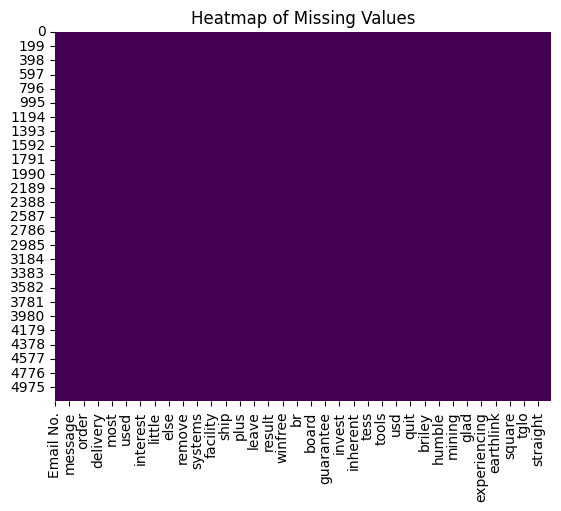

In [28]:
# Check for missing values
missing_values = emails_data.isnull().sum()
print(missing_values)

# Visualize missing values (optional but recommended)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(emails_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [29]:
# Description of dataset
emails_data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [30]:
# Encoding categorical variables
categorical_cols = emails_data.select_dtypes(include=['object']).columns
data = pd.get_dummies(emails_data, columns=categorical_cols, drop_first=True)
print(data.columns)

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'Email No._Email 990', 'Email No._Email 991', 'Email No._Email 992',
       'Email No._Email 993', 'Email No._Email 994', 'Email No._Email 995',
       'Email No._Email 996', 'Email No._Email 997', 'Email No._Email 998',
       'Email No._Email 999'],
      dtype='object', length=8172)


In [31]:
# Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data.columns)

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'Email No._Email 990', 'Email No._Email 991', 'Email No._Email 992',
       'Email No._Email 993', 'Email No._Email 994', 'Email No._Email 995',
       'Email No._Email 996', 'Email No._Email 997', 'Email No._Email 998',
       'Email No._Email 999'],
      dtype='object', length=8172)


In [37]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
target = 'Prediction'
features = data.drop(columns = [target]).columns
data[target] = pd.cut(data[target], bins = 3, labels = [0, 1, 2])
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size = 0.2, random_state = 42)

In [38]:

# Initialize and train the Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make a prediction on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression : ")
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))


Logistic Regression : 
Accuracy :  0.9690821256038648
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       739
           2       0.92      0.98      0.95       296

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035

Confusion Matrix : 
 [[713  26]
 [  6 290]]


In [39]:
# Initialize and train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(X_train, y_train)

# Make a prediction on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier : ")
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))


Decision Tree Classifier : 
Accuracy :  0.9265700483091788
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       739
           2       0.86      0.89      0.87       296

    accuracy                           0.93      1035
   macro avg       0.91      0.91      0.91      1035
weighted avg       0.93      0.93      0.93      1035

Confusion Matrix : 
 [[697  42]
 [ 34 262]]


In [41]:
# Initialize and train the SVM Classifier
from sklearn.svm import SVC
svm_classifier = SVC(random_state = 42)
svm_classifier.fit(X_train, y_train)

# Make a prediction on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("SVM Classifier : ")
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

SVM Classifier : 
Accuracy :  0.9468599033816425
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       739
           2       1.00      0.82      0.90       296

    accuracy                           0.95      1035
   macro avg       0.96      0.91      0.93      1035
weighted avg       0.95      0.95      0.95      1035

Confusion Matrix : 
 [[738   1]
 [ 54 242]]


### Logistic Regression performs best overall, with the highest accuracy (96.9%), a balanced precision, recall, and F1-score, and a smaller number of misclassifications in the confusion matrix. It handles both classes well.

In [36]:
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Perform 5-fold cross-validation and get the accuracy for each fold
cv_scores = cross_val_score(log_reg, X_train, Y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())
print("Standard deviation of cross-validation accuracy: ", cv_scores.std())


Cross-validation scores:  [0.96618357 0.97463768 0.96251511 0.96009674 0.97097944]
Mean cross-validation accuracy:  0.9668825099743558
Standard deviation of cross-validation accuracy:  0.00533923096250085
